In [1]:
import h5py
import cv2
import warp_norm
import matplotlib

fileroot = '/home/hgh/gaze/eve/valpart/val01/step030_video_Wikimedia-Joy-and-Heron-Animated-CGI-Spot-by-Passion-Pictures/basler.h5'

file = h5py.File(fileroot, 'r')
file.keys()

<KeysViewHDF5 ['camera_matrix', 'camera_transformation', 'face_PoG_tobii', 'face_R', 'face_W', 'face_g_tobii', 'face_h', 'face_o', 'facial_landmarks', 'head_rvec', 'head_tvec', 'inv_camera_transformation', 'left_PoG_tobii', 'left_R', 'left_W', 'left_g_tobii', 'left_h', 'left_o', 'left_p', 'millimeters_per_pixel', 'pixels_per_millimeter', 'right_PoG_tobii', 'right_R', 'right_W', 'right_g_tobii', 'right_h', 'right_o', 'right_p']>

In [2]:
camera_matrix = file['camera_matrix'][:]
print('camera_matrix:')
print(camera_matrix)
camera_transformation = file['inv_camera_transformation'][:]
print('camera_transformation:')
print(camera_transformation)
head_rvec = file['head_rvec']['data']
print('head_rvec:')
print(head_rvec)
head_tvec = file['head_tvec']['data']
print('head_tvec:')
print(head_tvec)

gaze = file['face_PoG_tobii']['data']
print('gaze[0]:')
print(gaze[0])
gaze_o = file['face_o']['data']
print('gaze_o[0]:')
print(gaze_o[0])
gazen = file['face_g_tobii']['data']
print('gazen[0]:')
print(gazen[0])

facial_landmarks = file['facial_landmarks']['data'][0]
print('facial_landmarks:')
print(facial_landmarks)

pixel_scale = file['millimeters_per_pixel'][:]
print(pixel_scale)

camera_matrix:
[[1.7806042e+03 0.0000000e+00 9.5932886e+02]
 [0.0000000e+00 1.7798547e+03 5.7931006e+02]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]]
camera_transformation:
[[-9.9983627e-01  6.6146357e-03 -1.6844638e-02  2.7073605e+02]
 [ 1.1720656e-02  9.4589680e-01 -3.2425594e-01  4.4385309e+02]
 [ 1.3788454e-02 -3.2440028e-01 -9.4581938e-01  5.6463486e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]
head_rvec:
<HDF5 dataset "data": shape (3600, 3, 1), type "<f4">
head_tvec:
<HDF5 dataset "data": shape (3600, 3, 1), type "<f4">
gaze[0]:
[955.92834 554.2141 ]
gaze_o[0]:
[ -6.5969653 -66.74155   689.5632   ]
gazen[0]:
[ 0.42263967 -0.01310608]
facial_landmarks:
[[ 738.  448.]
 [ 744.  496.]
 [ 758.  534.]
 [ 764.  568.]
 [ 784.  608.]
 [ 818.  628.]
 [ 844.  622.]
 [ 884.  614.]
 [ 944.  614.]
 [1004.  614.]
 [1050.  614.]
 [1082.  614.]
 [1116.  594.]
 [1130.  562.]
 [1142.  522.]
 [1150.  482.]
 [1150.  436.]
 [ 784.  342.]
 [ 804.  322.]
 [ 830.  310.]
 [ 858.  

## 检验人脸标定点

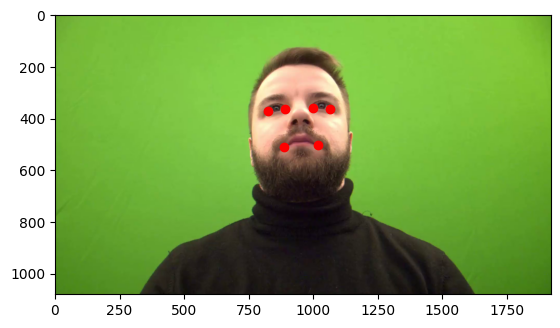

In [4]:
import sys
sys.path.append("./face-alignment")
import face_alignment
from skimage import io
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

video_path = fileroot[:-3] + '.mp4'
cap = cv2.VideoCapture(video_path)
idx = 0
ret,frame = cap.read()
# cv2.imshow('Frames', frame)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False)
preds = fa.get_landmarks(frame)
landmark_use = [36,39,42,45,48,54]
lm = preds[0]
lm = lm[landmark_use, :] 
# 红色的是我自己的
plt.scatter(lm[:,0],lm[:,1],c='r')
# plt.scatter(facial_landmarks[:,0],facial_landmarks[:,1],c='b')
plt.show()




# xtrans测试

[955.92834 554.2141 ]
[  -1.17272149 -151.40686773]


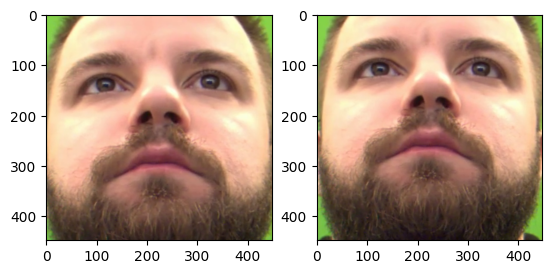

In [14]:
face = np.loadtxt('./data-preprocessing-gaze/data/faceModelGeneric.txt')
num_pts = face.shape[1]
facePts = face.T.reshape(num_pts, 3)
# print(facePts)
print(gaze[0])
# g = np.array([(gaze[0][0] - 1920/2) * pixel_scale[0], (gaze[0][1] - 1080) * pixel_scale[1]])
print(g)
frame1,_,gcn,R = warp_norm.xtrans(frame, hr, ht, camera_matrix, gaze[0])
frame2,_,_,_ = warp_norm.xtrans(frame, head_rvec[0], head_tvec[0], camera_matrix)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))


- tobii注视坐标:[955.92834 554.2141 ]
- 人脸注视原点:[ -6.5969653 -66.74155   689.5632   ]
- pitchyaw ？:[ 0.42263967 -0.01310608]

# 视频测试

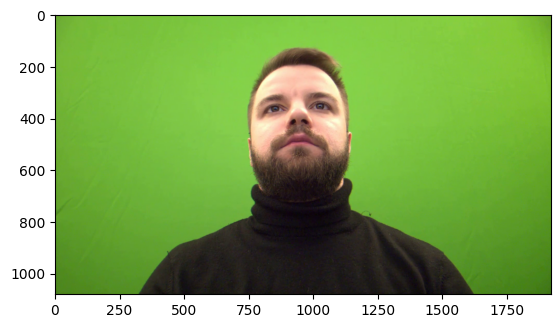

In [3]:
from matplotlib import pyplot as plt
import numpy as np
video_path = fileroot[:-3] + '.mp4'
cap = cv2.VideoCapture(video_path)
out = cv2.VideoWriter('./test.avi',cv2.VideoWriter_fourcc('M','J','P','G'),30,(448,448))
idx = 0
while True:
    ret,frame = cap.read()
    if idx == 150:
        break
    if not ret:   
        break
    # cv2.imshow('Frames', frame)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    hr, ht = warp_norm.xnorm(frame, camera_matrix, np.array([-0.16321888, 0.66783406, -0.00121854, -0.00303158, -1.02159927]))
    frame1,_,gcn,R = warp_norm.xtrans(frame, hr, ht, camera_matrix, gaze[idx])
    frame2 = warp_norm.draw_gaze(frame1, gcn)
    frame3 = warp_norm.draw_gaze_pitchyaw(frame1, gazen[idx], color = [0, 255, 0])
    out.write(frame3)
    idx = idx + 1
    
    if cv2.waitKey(10) & 0xFF == ord('q') :
        break
cap.release()
out.release()
cv2.destroyAllWindows()